In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
Logistic Regression Accuracy: 100.00%


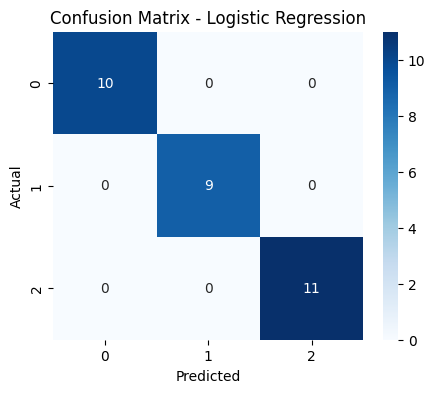

Decision Tree Accuracy: 100.00%


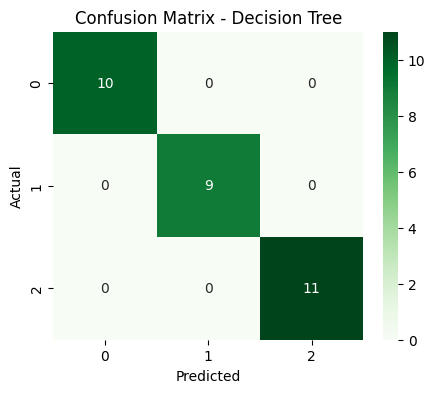

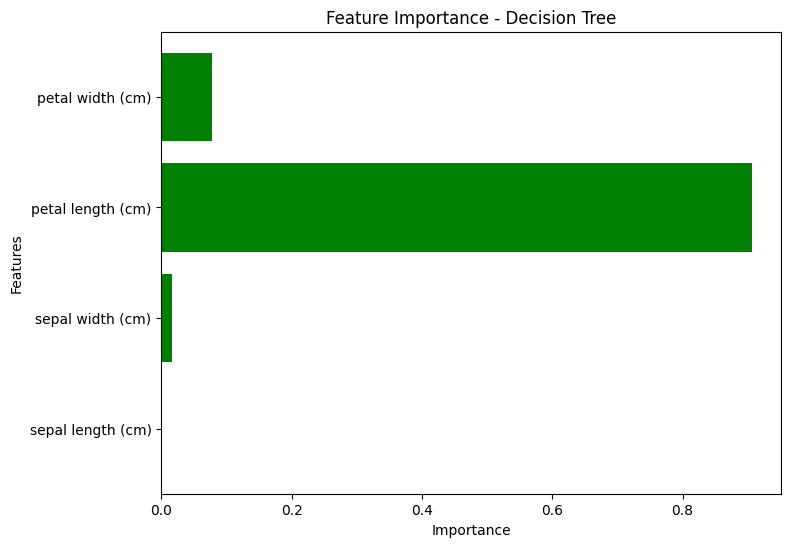

In [2]:
iris = load_iris()
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['species'])

# Check for missing values
print(X.isnull().sum())

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression (since Linear Regression is not suited for classification)
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train.values.ravel())

y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Logistic Regression Accuracy: {accuracy_log * 100:.2f}%')

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Decision Tree Accuracy: {accuracy_tree * 100:.2f}%')

cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

feature_importance = tree_clf.feature_importances_
features = iris['feature_names']
plt.figure(figsize=(8,6))
plt.barh(features, feature_importance, color='green')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [3]:
# Example with random values to check classification

new_data = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Example of a new sample similar to Setosa
    [6.7, 3.0, 5.2, 2.3],  # Example of a new sample similar to Virginica
    [5.9, 3.0, 4.2, 1.5]   # Example of a new sample similar to Versicolor
])

new_data_scaled = scaler.transform(new_data)

# Logistic Regression predictions
y_pred_log_new = log_reg.predict(new_data_scaled)
print("Logistic Regression Predictions on New Data:", y_pred_log_new)

# Decision Tree predictions
y_pred_tree_new = tree_clf.predict(new_data_scaled)
print("Decision Tree Predictions on New Data:", y_pred_tree_new)

species_names = iris['target_names']

log_pred_species = [species_names[pred] for pred in y_pred_log_new]
tree_pred_species = [species_names[pred] for pred in y_pred_tree_new]

print("Logistic Regression predicted species:", log_pred_species)
print("Decision Tree predicted species:", tree_pred_species)


Logistic Regression Predictions on New Data: [0 2 1]
Decision Tree Predictions on New Data: [0 2 1]
Logistic Regression predicted species: ['setosa', 'virginica', 'versicolor']
Decision Tree predicted species: ['setosa', 'virginica', 'versicolor']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
